# Austin Reed

CLIM 680 Assignment #3

Calculate a composites of your data based on a climate index other than Nino3.4 and plot maps of your composite.

In [15]:
# import all necessary packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from clim680_function import xyticks

In [27]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [28]:
#Climate index of choice: North Atlantic Oscillation (NAO)
path='/shared/ccsm4/kpegion/obs2/CLIM_INDICES/'
file='nao.data'
index_name='nao'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(3).index,inplace=True)


In [29]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1948-1-01


In [30]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [31]:
clim_index=df.T.unstack().values
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='nao')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    nao      (time) object nan nan nan nan nan nan ... 0.03 1.11 nan nan nan

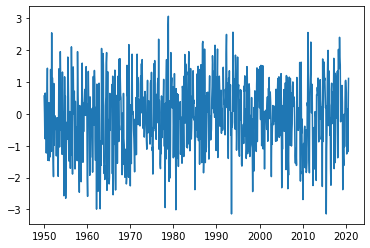

In [32]:
plt.plot(ds_index['time'],ds_index['nao'])

In [33]:
#Slice array to be consistent with precip data
sliced_nao=ds_index.sel(time=slice(ds_index['time'][372],ds_index['time'][-1]))
print(sliced_nao)

#positive- above 1
#negative-below -1
nao_values = sliced_nao.nao
#print(nao_values)
nao_float = nao_values.astype(float)
pos_nao=nao_float.where(nao_float>1)
neg_nao = nao_float.where(nao_float<-1)
neutral=nao_float.where(np.logical_and(nao_float>-1,nao_float <1))
print(pos_nao)

<xarray.Dataset>
Dimensions:  (time: 504)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    nao      (time) object '-2.12' '-1.20' '0.41' -2.01 ... 1.11 nan nan nan
<xarray.DataArray 'nao' (time: 504)>
array([ nan,  nan,  nan,  nan,  nan, 1.92,  nan, 1.11, 1.13,  nan,  nan,
        nan,  nan,  nan,  nan, 1.26,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.18,  nan,
       1.86,  nan, 1.55, 1.56, 1.34,  nan,  nan,  nan,  nan, 1.31, 1.22,
       1.95,  nan, 1.22,  nan,  nan, 1.42,  nan,  nan,  nan,  nan,  nan,
        nan, 1.35,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan, 1.25,  nan,  nan, 1.49,  nan,  nan,  nan,  nan, 1.39,  nan,
        nan, 1.54,  nan,  nan,  nan, 2.2 , 2.27,  nan,  nan,  nan,  nan,
       2.03,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan, 

In [34]:
# Counts the number of months with Positive NAO, Negative NAO, and Neutral
counts=[pos_nao.count(dim='time').values,
        neg_nao.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

[array(90), array(90), array(317)]


Next: load in my dataset 
(ERA5 monthly averaged data on single levels over Africa)

In [35]:
f= '/scratch/areed29/ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
dataset =DS1.mean(dim='expver')
data_lat= DS1.latitude #latitudes
data_lon= DS1.longitude #longitudes
precip = dataset.tp
print(precip)

<xarray.DataArray 'tp' (time: 513, latitude: 401, longitude: 241)>
dask.array<mean_agg-aggregate, shape=(513, 401, 241), dtype=float32, chunksize=(513, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01


In [36]:
precip=precip.sel(time=slice(ds_index['time'][0],ds_index['time'][-1]))
precip


<xarray.DataArray 'tp' (time: 504, latitude: 401, longitude: 241)>
dask.array<getitem, shape=(504, 401, 241), dtype=float32, chunksize=(504, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01

In [37]:
# Mask out only land values for data, then calculate the climatology
ds_mean = DS1.mean('expver')
mask = ds_mean.lsm #loads in land-sea mask
land_ds = ds_mean.where(mask>0.5)
ds_climo = land_ds.groupby('time.month').mean()
#Now calculate land anomalies
ds_anoms = land_ds.groupby('time.month')-ds_climo
print(ds_anoms)


<xarray.Dataset>
Dimensions:    (latitude: 401, longitude: 241, time: 513)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8 9
Data variables: (12/34)
    cbh        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    cp         (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    crr        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    hcc        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    ilspf      (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    lsm        (time, latitude, longitude) float32 das

In [38]:
#Next, select the dates that match Positive, Negative, Neutral NAO

pos_nao_precip = ds_anoms.sel(time =pos_nao.dropna(dim='time')['time']).mean(dim='time')
neg_nao_precip= ds_anoms.sel(time=neg_nao.dropna(dim='time')['time']).mean(dim='time')
neutral_precip= ds_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_precip = [pos_nao_precip,neg_nao_precip,neutral_precip]
print(comp_precip)

[<xarray.Dataset>
Dimensions:    (latitude: 401, longitude: 241)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
Data variables: (12/34)
    cbh        (latitude, longitude) float32 dask.array<chunksize=(401, 241), meta=np.ndarray>
    cp         (latitude, longitude) float32 dask.array<chunksize=(401, 241), meta=np.ndarray>
    crr        (latitude, longitude) float32 dask.array<chunksize=(401, 241), meta=np.ndarray>
    hcc        (latitude, longitude) float32 dask.array<chunksize=(401, 241), meta=np.ndarray>
    ilspf      (latitude, longitude) float32 dask.array<chunksize=(401, 241), meta=np.ndarray>
    lsm        (latitude, longitude) float32 dask.array<chunksize=(401, 241), meta=np.ndarray>
    ...         ...
    p90.162    (latitude, longitude) float32 dask.array<chunksize=(401, 241), meta=np.ndarray>
    p88.162    (latitude, longitude) float32 dask.arr

Text(0.5, 0.98, 'Composite Precipitation Anomalies during NAO')

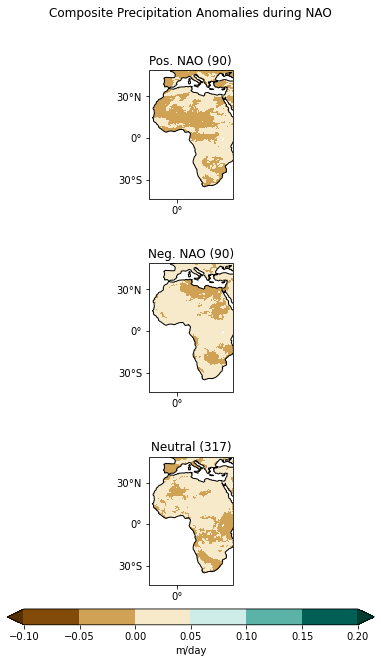

In [39]:
labels=['Pos. NAO','Neg. NAO', 'Neutral']
clevs=np.arange(-0.1,0.2,0.05)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,nao in enumerate(comp_precip):

        # Select the season
        data=comp_precip[i]['tp']

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=comp_precip[i]['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_precip[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude and latitude labels
        xyticks(axs[i],lons,comp_precip[i]['latitude'])
        #Set extent for the plots
        axs[i].set_extent([-20,40,-40,45])
        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies during NAO')